 ***Building accessibility map for pedestrians in Tartu city***

Our
objective is to measure the walk and drive time needed to access different points of interest
(POI) in Tartu city from each other such as shops, restaurants, offices, gyms, bus stations,
etc

In [ ]:
import overpy

In [6]:
overpass_api = overpy.Overpass()

In [7]:
import pandana, time, os, pandas as pd, numpy as np
import pandana, matplotlib.pyplot as plt
from pandana.loaders import osm
%matplotlib inline
import osmnet
import pandana

In [8]:
bbox = [58.32139,26.54778,58.42868,26.91719] #lat-long bounding box for berkeley/oakland
amenities = ['school','restaurant'] #accessibility to this type of amenity
distance = 1500 #max distance in meters
#26.54778,58.42868,26.91719,58.32139

In [9]:
# first download the points of interest corresponding to the specified amenity type
#pois = osm.node_query(bbox[0], bbox[1], bbox[2], bbox[3], tags='"amenity"="{}"'.format(amenity))
#pois[['amenity', 'name', 'lat', 'lon']].head()

In [10]:

pois = osm.node_query(bbox[0], bbox[1], bbox[2], bbox[3])
pois = pois[pois['amenity'].isin(amenities)]
pois[['amenity', 'name', 'lat', 'lon']].head()


,amenity,name,lat,lon
id,,,,
334456632,restaurant,Pierre,58.380458,26.723447
334456780,restaurant,Truffe,58.380550,26.724018
334456848,restaurant,Taverna,58.380742,26.724544
334459163,restaurant,Entri,58.381178,26.722357
334459676,restaurant,Hot Pot,58.381058,26.721403


In [ ]:
network = osmnet.network_from_bbox(bbox[0], bbox[1], bbox[2], bbox[3],network_type='walk')
network.head()

In [14]:
network = osmnet.network_from_bbox(bbox[0], bbox[1], bbox[2], bbox[3])
network=pandana.Network(network[0]["x"],network[0]["y"], network[1]["from"], network[1]["to"],
                 network[1][["distance"]])
lcn = network.low_connectivity_nodes(impedance=1000, count=10, imp_name='distance')
network.save_hdf5(filename='my_network', rm_nodes=lcn) #remove low-connectivity nodes and save to h5

E:\python\installconda\envs\geopy2020\lib\site-packages\osmnet\load.py:445: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
E:\python\installconda\envs\geopy2020\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


Requesting network data within bounding box from Overpass API in 1 request(s)
Posting to http://www.overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"]["highway"!~"motor|proposed|construction|abandoned|platform|raceway"]["foot"!~"no"]["pedestrians"!~"no"](58.32139000,26.54778000,58.42868000,26.91719000);>;);out;'}"
Downloaded 7,593.7KB from www.overpass-api.de in 2.41 seconds
Downloaded OSM network data within bounding box from Overpass API in 1 request(s) and 2.64 seconds
Returning OSM data with 55,904 nodes and 11,085 ways...
Edge node pairs completed. Took 24.30 seconds
Returning processed graph with 16,196 nodes and 23,671 edges...
Completed OSM data download and Pandana node and edge table creation in 28.79 seconds


In [15]:
len(network.node_ids)

16196

In [16]:
lcn = network.low_connectivity_nodes(impedance=1000, count=10, imp_name='distance')

In [17]:
network.precompute(distance + 1)
network.init_pois(num_categories=1, max_dist=distance, max_pois=5)
network.set_pois(category='school', x_col=pois['lon'], y_col=pois['lat'])

# search for the n nearest amenities to each node in the network
access = network.nearest_pois(distance=distance, category='school', num_pois=5)

# each df cell represents the network distance from the node to each of the n POIs
access.head()

Reading parameters from init_pois()
Reading parameters from init_pois()


,1,2,3,4,5
id,,,,,
8220933,143.690002,250.028000,274.545990,287.332001,383.045990
8220937,199.572998,305.911011,330.428986,343.214996,397.768005
8220941,280.627991,316.713013,386.966003,411.484009,424.269989
8220974,474.431000,653.283020,744.797974,750.039001,762.580017
8221115,656.786011,815.278015,994.130005,1085.645020,1103.427002


In [18]:
# keyword arguments to pass for the matplotlib figure
bbox_aspect_ratio = (bbox[2] - bbox[0]) / (bbox[3] - bbox[1])
fig_kwargs = {'facecolor':'w', 
              'figsize':(10, 10 * bbox_aspect_ratio)}

# keyword arguments to pass for scatter plots
plot_kwargs = {'s':5, 
               'alpha':0.9, 
               'cmap':'viridis_r', 
               'edgecolor':'none'}
# keyword arguments to pass for hex bin plots
hex_plot_kwargs = {'gridsize':60,
                   'alpha':0.9, 
                   'cmap':'viridis_r', 
                   'edgecolor':'none'}

# keyword arguments to pass to make the colorbar
cbar_kwargs = {}

# keyword arguments to pass to basemap
bmap_kwargs = {}

# color to make the background of the axis
bgcolor = 'k'

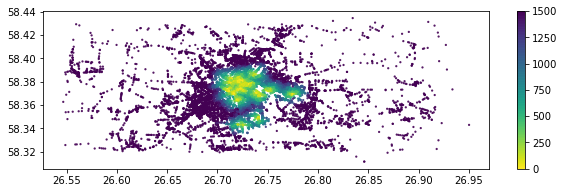

ValueError: not enough values to unpack (expected 3, got 2)

In [19]:
# plot the distance to the nth nearest amenity
n = 1
bmap, fig, ax = network.plot(access[n], bbox=bbox, plot_kwargs=plot_kwargs, fig_kwargs=fig_kwargs)
ax.set_axis_bgcolor('k')
ax.set_title('Walking distance (m) to nearest school around Tartu', fontsize=15)
plt.show()

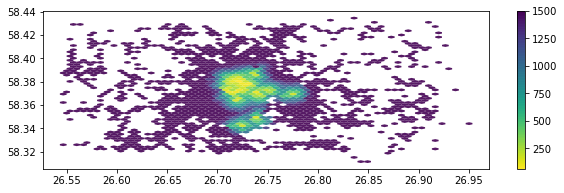

ValueError: not enough values to unpack (expected 3, got 2)

In [20]:
bmap, fig, ax = network.plot(access[1], bbox=bbox, plot_type='hexbin', plot_kwargs=hex_plot_kwargs, 
                             fig_kwargs=fig_kwargs, cbar_kwargs=cbar_kwargs)
ax.set_axis_bgcolor(bgcolor)
ax.set_title('Walking distance (m) to nearest amenity around Berkeley/Oakland', fontsize=15)


Reading parameters from init_pois()
Reading parameters from init_pois()
Reading parameters from init_pois()
Reading parameters from init_pois()


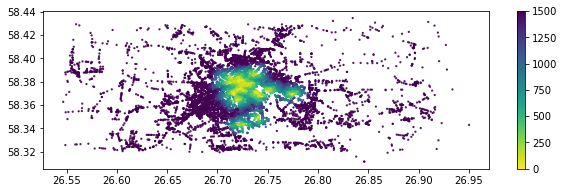

ValueError: not enough values to unpack (expected 3, got 2)

In [22]:
#Calculate and plot accessibility separately for each amenity type
# initialize each amenity category with the locations specified by the lon and lat columns
start_time = time.time()
num_pois=5
for amenity in amenities:
    pois_subset = pois[pois['amenity']=='restaurant']
    network.set_pois(category=amenity, x_col=pois_subset['lon'], y_col=pois_subset['lat'])


# distance to the nearest restaurant
restaurant_access = network.nearest_pois(distance=distance, category='restaurant', num_pois=num_pois)
bmap, fig, ax = network.plot(restaurant_access[1], bbox=bbox, plot_kwargs=plot_kwargs,fig_kwargs=fig_kwargs, cbar_kwargs=cbar_kwargs )
ax.set_axis_bgcolor(bgcolor)
ax.set_title('Walking distance (m) to nearest restaurant around Berkeley/Oakland', fontsize=15)



(63, 16)

In [25]:
import networkx as nx
import osmnx as ox

%matplotlib inline
ox.config(log_console=True)
ox.__version__
import overpy

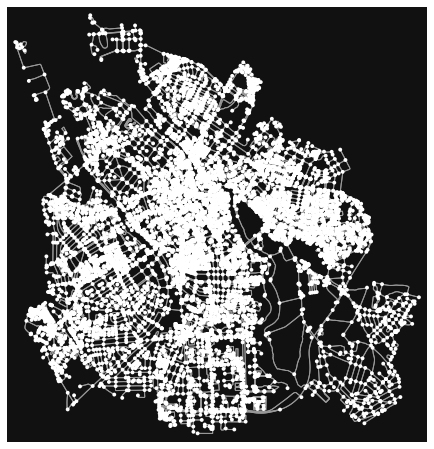

In [26]:
G = ox.graph_from_place("Tartu, Estonia", network_type="walk")
fig, ax = ox.plot_graph(G)

In [28]:
# get all building footprints in some neighborhood
place = "Tartu,Estonia"
tags = {"leisure": "park"}
gdf = ox.geometries_from_place(place, tags)
gdf.shape

E:\python\installconda\envs\geopy2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(63, 16)

E:\python\installconda\envs\geopy2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


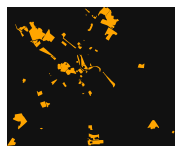

In [29]:
fig, ax = ox.plot_footprints(gdf, figsize=(3, 3))

In [30]:
import matplotlib.pyplot as plt
import osmnx as ox
from descartes import PolygonPatch
from shapely.geometry import MultiPolygon
from shapely.geometry import Polygon
%matplotlib inline
ox.config(log_console=True)
ox.__version__

E:\python\installconda\envs\geopy2020\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'0.16.2'

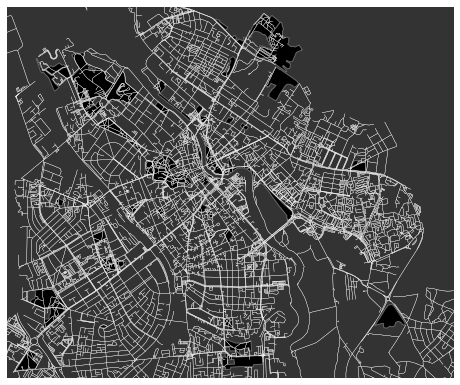

In [31]:
# plot the network, but do not show it or close it yet
fig, ax = ox.plot_graph(
    G,
    show=False,
    close=False,
    bgcolor="#333333",
    edge_color="w",
    edge_linewidth=0.3,
    node_size=0,
)

# to this matplotlib axis, add the place shape as descartes polygon patches
for geometry in gdf["geometry"].tolist():
    if isinstance(geometry, (Polygon, MultiPolygon)):
        if isinstance(geometry, Polygon):
            geometry = MultiPolygon([geometry])
        for polygon in geometry:
            patch = PolygonPatch(polygon, fc="k", ec="#666666", lw=1, alpha=1, zorder=-1)
            ax.add_patch(patch)

# optionally set up the axes extents
margin = 0.02
west, south, east, north = gdf.unary_union.bounds
margin_ns = (north - south) * margin
margin_ew = (east - west) * margin
ax.set_ylim((south - margin_ns, north + margin_ns))
ax.set_xlim((west - margin_ew, east + margin_ew))
plt.show()